### bazı eksik ve yanlış anladığım kısımları isterler dokümanında inceledikten sonra tekrardan fark ettim ve toparlanmış bir biçimde kalem id'lerine göre modelleme olarak toparlanmış notebook'u oluşturuyorum

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.covariance import EmpiricalCovariance
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.multioutput import RegressorChain
from sklearn.cluster import KMeans
import numpy as np
np.random.seed(123)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import TimeSeriesSplit
import seaborn as sns
sns.set_style('dark')
from datetime import datetime, timedelta
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (15, 6)
import matplotlib.pyplot as plt
import pandas as pd
import math

import tensorflow as tf
tf.random.set_seed(1)
import pmdarima as pm
import pandas as pd
import numpy as np
from pmdarima import model_selection
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
import plotly.express as px



from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D, MaxPooling1D  # Import directly from keras.layers
from keras.layers import LSTM, RepeatVector, TimeDistributed, Flatten
from keras.layers import SimpleRNN, GRU, LSTM
from keras.layers import SimpleRNN, GRU, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from IPython.display import set_matplotlib_formats
import itertools
import warnings


warnings.filterwarnings('ignore')

from pandas import read_csv
from matplotlib import pyplot

In [117]:
data = pd.read_excel('magazalar.xlsx')
data

,db_id,kalem,mağaza,tarih,satış adedi,satış tutarı
0,79444,50012011250,312,2019-08-03,3,29.97
1,79445,50012011250,312,2019-08-04,2,19.98
2,79446,50012011250,312,2019-08-05,5,49.95
3,79447,50012011250,312,2019-08-06,3,29.97
4,79448,50012011250,312,2019-08-07,7,69.93
...,...,...,...,...,...,...
19273,82140,50*12011250,632,2017-05-09,2,19.98
19274,82174,50*12011250,632,2017-06-19,-A45%0 4,NaN
19275,82341,50*12011250,632,2018-01-09,-A45%0 2,NaN
19276,82480,50*12011250,632,2018-06-21,2,19.98


In [116]:
## raw datayı da çekelim
raw_data = pd.read_excel('3_Selco_Veri Analizi_XYZGroup_Data_RAW.xlsx')
raw_data

,Bölüm,Sınıf,Stil,Renk,Kalem,Maliyet,Fiyat,Tedarikçi
0,800,5,20,2,8000520021,7.5,9.99,Üst Kalite Üretici Firma
1,800,4,51,11,8000451112,9.0,12.99,Üst Kalite Üretici Firma
2,731,24,55,52,7312455520,25.0,31.99,Üst Kalite Üretici Firma
3,731,24,55,53,7312455530,14.5,22.99,Toptancı Firma
4,5001,201,12,4,50012011240,2.5,7.99,Çinden İthalatçı Firma
5,5001,201,12,5,50012011250,7.5,9.99,Çinden İthalatçı Firma
6,5001,201,13,4,50012011341,8.0,6.99,Çinden İthalatçı Firma
7,5001,300,1,1,50013000110,6.5,12.99,Çinden İthalatçı Firma


### raw data üzerinden kar değerlerini de data sütununa ek feature olarak eklersek önemli bir değer elde etmiş oluruz. tedarikçisinin kim olduğu veya rengi stili sonraki çıkarımların meselesi

In [118]:
data[['kalem']].value_counts()

kalem      
8000520021     4709
8000451112     4011
50012011250    3045
50012011240    2657
50012011340    1779
7312455520     1236
7312455530      909
50012011341     765
50013000110     137
50*12011250      30
dtype: int64

In [119]:
print(len(data.loc[data['kalem'] == 8000520021]))
print(len(data.query('kalem == 50*12011250')))
print(len(data.query('kalem == 50012011250')))

4709
0
3045


## 50012011340 ve 50*12011250 (değiştirdik artık 50012011250) bu kalem idlerinin fiyat bilgisi raw_dataya girilmemiş çok büyük eksik.

## ayrıca 50012011341 id'li kalem serisinde fiyat ve maliyet verisi yanlış girilmiş olabilir kimse zararına kalem satmaz ama yine de şuan için değişiklik yapmıyorum. MÜŞTERİ BU KONUDA UYARILMALI VE NE KADAR ZARAR ETTİĞİ GÖSTERİLMELİ

## bu kalem id'lerini kullanmamak en doğrusu olacak

In [120]:
data[['kalem']] = data[['kalem']].replace('50*12011250', 50012011250)

data.loc[data['kalem'] == 8000520021, 'profit'] = 2.49
data.loc[data['kalem'] == 8000451112, 'profit'] = 3.99
data.loc[data['kalem'] == 7312455520, 'profit'] = 6.99
data.loc[data['kalem'] == 7312455530, 'profit'] = 8.49
data.loc[data['kalem'] == 50012011240, 'profit'] = 5.49
data.loc[data['kalem'] == 50012011250, 'profit'] = 9.99 - 7.5
data.loc[data['kalem'] == 50012011341, 'profit'] = 6.99 - 8 # zararına mı satıyor?
data.loc[data['kalem'] == 50013000110, 'profit'] = 12.99 - 6.5

In [121]:
print(len(data.loc[data['kalem'] == 8000520021]))
print(len(data.loc[data['kalem'] == 50012011250]))

4709
3075


In [122]:
data[data['profit'].isna()].kalem.value_counts()

50012011340    1779
Name: kalem, dtype: int64

### profiti NaN olanlara herhangi bir değer vermek doğru olmayabilir. şu an için NaN profitleri datasetten çıkartıyoruz ve müşteriye bu id'deki kalemlerin verisini vermesini istiyoruz

In [123]:
data = data.dropna(subset=['profit'])
data

,db_id,kalem,mağaza,tarih,satış adedi,satış tutarı,profit
0,79444,50012011250,312,2019-08-03,3,29.97,2.49
1,79445,50012011250,312,2019-08-04,2,19.98,2.49
2,79446,50012011250,312,2019-08-05,5,49.95,2.49
3,79447,50012011250,312,2019-08-06,3,29.97,2.49
4,79448,50012011250,312,2019-08-07,7,69.93,2.49
...,...,...,...,...,...,...,...
19273,82140,50012011250,632,2017-05-09,2,19.98,2.49
19274,82174,50012011250,632,2017-06-19,-A45%0 4,NaN,2.49
19275,82341,50012011250,632,2018-01-09,-A45%0 2,NaN,2.49
19276,82480,50012011250,632,2018-06-21,2,19.98,2.49


In [163]:
print(data.columns[data.isnull().any()])

Index([], dtype='object')


In [126]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
db_id,17499.0,2.019363e+05,4.018621e+05,3.456100e+04,8.042850e+04,8.935600e+04,9.306650e+04,2.001795e+06
kalem,17499.0,2.384304e+10,2.045015e+10,7.312456e+09,8.000451e+09,8.000520e+09,5.001201e+10,5.001300e+10
mağaza,17499.0,4.553250e+02,1.277649e+02,3.120000e+02,3.230000e+02,4.150000e+02,6.320000e+02,6.320000e+02
satış tutarı,17211.0,7.392369e+02,1.714830e+04,-8.991000e+01,2.299000e+01,4.598000e+01,9.990000e+01,8.991000e+05
profit,17499.0,3.797160e+00,2.033467e+00,-1.010000e+00,2.490000e+00,3.990000e+00,5.490000e+00,8.490000e+00


### tarihi artan bir biçimde yapalım bakalım bi zaman serisi analizi olur mu

In [127]:
data['tarih'] = pd.to_datetime(data['tarih'], format='%Y-%m-%d')
data = data.sort_values(by='tarih', ascending=True)

In [128]:
data

,db_id,kalem,mağaza,tarih,satış adedi,satış tutarı,profit
9093,1145701,50012011240,415,2016-07-30,2,15.98,5.49
17605,78921,50012011240,632,2016-07-30,3,23.97,5.49
12634,34561,50012011240,521,2016-07-30,1,7.99,5.49
9618,80677,50012011250,415,2016-07-30,3,299.97,2.49
13171,81294,50012011250,521,2016-07-30,6,59.94,2.49
...,...,...,...,...,...,...,...
1704,90156,8000451112,312,2021-08-18,38,493.62,3.99
1703,90155,8000451112,312,2021-08-18,35,454.65,3.99
3154,1001036,8000520021,312,2021-08-19,10,99.90,2.49
1705,90157,8000451112,312,2021-08-19,40,519.60,3.99


In [129]:
data['tarih'] = pd.to_datetime(data['tarih'])
data['month'] = data['tarih'].dt.month.astype(int)
data['day_of_month'] = data['tarih'].dt.day.astype(int)
# day_of_week=0 corresponds to Monday
data['day_of_week'] = data['tarih'].dt.dayofweek.astype(int)
selected_columns = ['tarih','month','day_of_month', 'day_of_week']
data[selected_columns]
# add date as string column
data["DATE_STR"] = data["tarih"].astype(str)

In [130]:
data['tarih'].isna().sum() #sıkıntı yok olsa fenaydı

0

In [131]:
data

,db_id,kalem,mağaza,tarih,satış adedi,satış tutarı,profit,month,day_of_month,day_of_week,DATE_STR
9093,1145701,50012011240,415,2016-07-30,2,15.98,5.49,7,30,5,2016-07-30
17605,78921,50012011240,632,2016-07-30,3,23.97,5.49,7,30,5,2016-07-30
12634,34561,50012011240,521,2016-07-30,1,7.99,5.49,7,30,5,2016-07-30
9618,80677,50012011250,415,2016-07-30,3,299.97,2.49,7,30,5,2016-07-30
13171,81294,50012011250,521,2016-07-30,6,59.94,2.49,7,30,5,2016-07-30
...,...,...,...,...,...,...,...,...,...,...,...
1704,90156,8000451112,312,2021-08-18,38,493.62,3.99,8,18,2,2021-08-18
1703,90155,8000451112,312,2021-08-18,35,454.65,3.99,8,18,2,2021-08-18
3154,1001036,8000520021,312,2021-08-19,10,99.90,2.49,8,19,3,2021-08-19
1705,90157,8000451112,312,2021-08-19,40,519.60,3.99,8,19,3,2021-08-19


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17499 entries, 9093 to 1706
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   db_id         17499 non-null  int64         
 1   kalem         17499 non-null  int64         
 2   mağaza        17499 non-null  int64         
 3   tarih         17499 non-null  datetime64[ns]
 4   satış adedi   17294 non-null  object        
 5   satış tutarı  17211 non-null  float64       
 6   profit        17499 non-null  float64       
 7   month         17499 non-null  int32         
 8   day_of_month  17499 non-null  int32         
 9   day_of_week   17499 non-null  int32         
 10  DATE_STR      17499 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(3), int64(3), object(2)
memory usage: 1.4+ MB


In [137]:
data[['satış adedi']].value_counts()

satış adedi
1              3158
2              3061
3              2517
4              1961
5              1391
               ... 
83                1
82                1
80                1
79                1
-A45%0 9          1
Length: 117, dtype: int64

In [133]:
print(data.columns.tolist())

['db_id', 'kalem', 'mağaza', 'tarih', 'satış adedi', 'satış tutarı', 'profit', 'month', 'day_of_month', 'day_of_week', 'DATE_STR']


### korelasyon matrisi bakalım

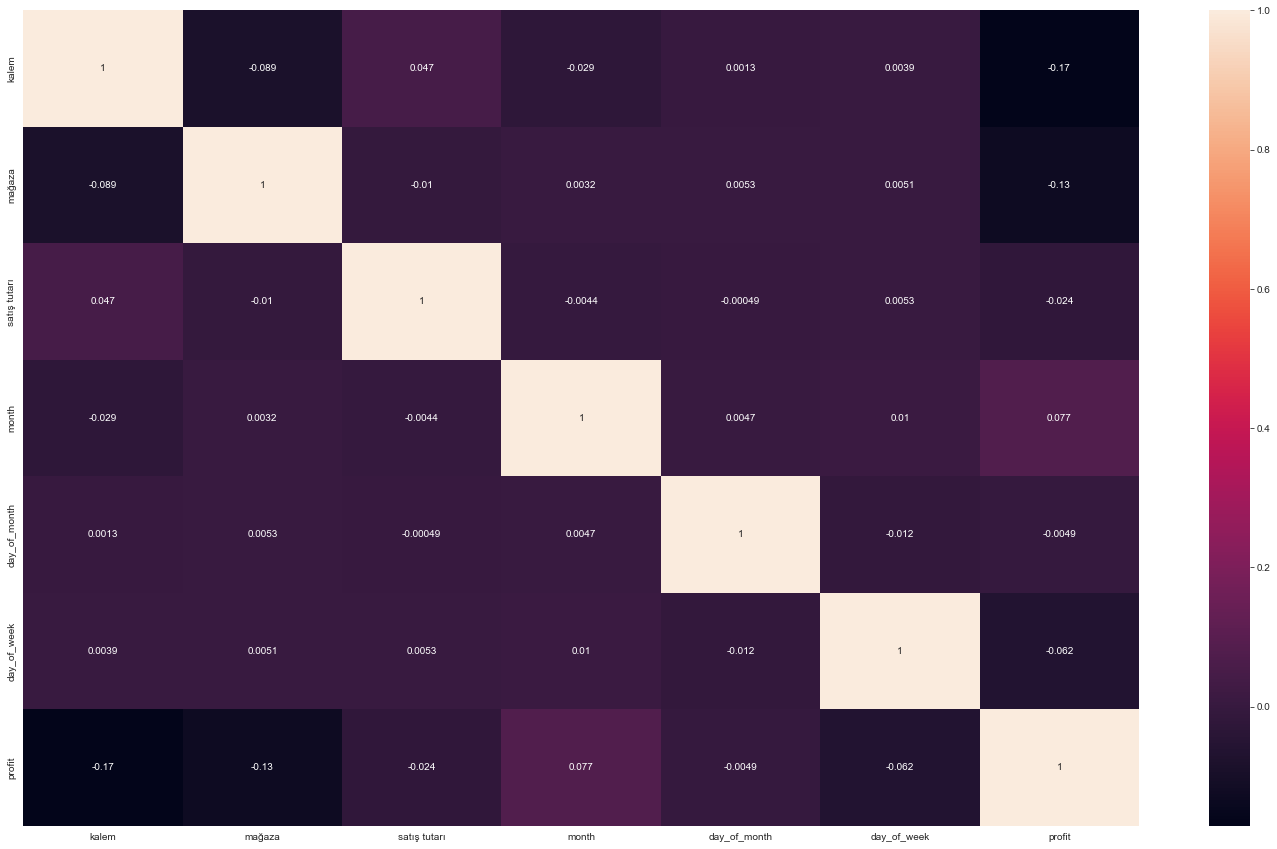

In [135]:
cols_corr = ['kalem', 'mağaza', 'tarih', 'satış adedi', 'satış tutarı', 'month', 'day_of_month', 'day_of_week', 'profit']
corrMatrix = data[cols_corr].corr()
plt.figure(figsize=(25,15))
fig_corr = sns.heatmap(corrMatrix, annot=True)
plt.show()

### yüksek korelasyon durumu yok, şu an için çıkartılması gereken herhangi bir feature da yok gibi duruyor gerekirse geri döner çıkartırız

### satış adedi ve satış tutarı için rolling mean metoduyla verileri dolduralım. zaman serisi analizine uygun bir tarihlendirme de yaptığımıza göre bu durum teorik açıdan geçmiş verilerine bakarak gerçekleştirilebilir duruyor. bu noktada dikkat etmemiz gereken detay, her bir id'si farklı kalemin kendi profit geçmişine göre odaklanmış bir biçimde ağırlıklı ortalamasının alınması daha doğru bir yaklaşım olur.

In [141]:
#data['satış adedi'] = pd.to_numeric(data['satış adedi'], errors='coerce')
data = data[data['satış adedi'].apply(lambda x: str(x).replace('.', '').isdigit())]
data[['satış adedi']].value_counts()

satış adedi
1.0            3158
2.0            3061
3.0            2517
4.0            1961
5.0            1391
               ... 
83.0              1
82.0              1
80.0              1
79.0              1
90000.0           1
Length: 93, dtype: int64

In [142]:
data['satış adedi'] = data.groupby('kalem')['satış adedi'].apply(lambda x: x.fillna(x.rolling(window=3000, min_periods=1).mean()))

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17134 entries, 9093 to 1706
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   db_id         17134 non-null  int64         
 1   kalem         17134 non-null  int64         
 2   mağaza        17134 non-null  int64         
 3   tarih         17134 non-null  datetime64[ns]
 4   satış adedi   17134 non-null  float64       
 5   satış tutarı  17134 non-null  float64       
 6   profit        17134 non-null  float64       
 7   month         17134 non-null  int32         
 8   day_of_month  17134 non-null  int32         
 9   day_of_week   17134 non-null  int32         
 10  DATE_STR      17134 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(3), int64(3), object(1)
memory usage: 1.4+ MB


In [144]:
data[['satış adedi']]

,satış adedi
9093,2.0
17605,3.0
12634,1.0
9618,3.0
13171,6.0
...,...
1704,38.0
1703,35.0
3154,10.0
1705,40.0


In [145]:
data

,db_id,kalem,mağaza,tarih,satış adedi,satış tutarı,profit,month,day_of_month,day_of_week,DATE_STR
9093,1145701,50012011240,415,2016-07-30,2.0,15.98,5.49,7,30,5,2016-07-30
17605,78921,50012011240,632,2016-07-30,3.0,23.97,5.49,7,30,5,2016-07-30
12634,34561,50012011240,521,2016-07-30,1.0,7.99,5.49,7,30,5,2016-07-30
9618,80677,50012011250,415,2016-07-30,3.0,299.97,2.49,7,30,5,2016-07-30
13171,81294,50012011250,521,2016-07-30,6.0,59.94,2.49,7,30,5,2016-07-30
...,...,...,...,...,...,...,...,...,...,...,...
1704,90156,8000451112,312,2021-08-18,38.0,493.62,3.99,8,18,2,2021-08-18
1703,90155,8000451112,312,2021-08-18,35.0,454.65,3.99,8,18,2,2021-08-18
3154,1001036,8000520021,312,2021-08-19,10.0,99.90,2.49,8,19,3,2021-08-19
1705,90157,8000451112,312,2021-08-19,40.0,519.60,3.99,8,19,3,2021-08-19


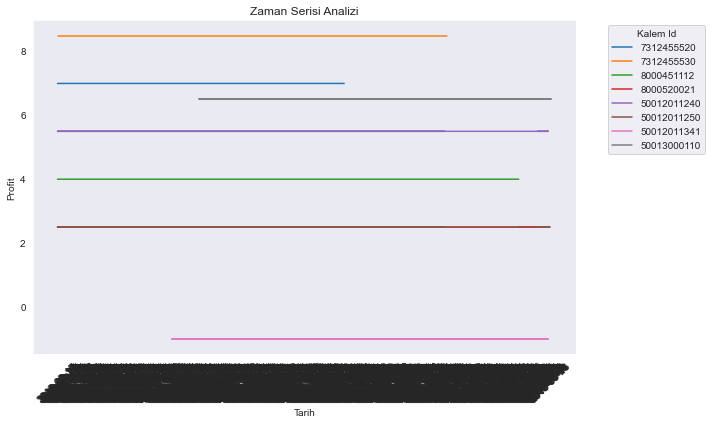

In [150]:
data_sorted = data.sort_values(by='tarih')
fig, ax = plt.subplots(figsize=(10, 6))

for kalem, group in data_sorted.groupby('kalem'):
    ax.plot(group['DATE_STR'], group['profit'], label=kalem)

# Eksen etiketleri ve başlık ekleme
ax.set_xlabel('Tarih')
ax.set_ylabel('Profit')
ax.set_title('Zaman Serisi Analizi')
ax.legend(title='Kalem Id', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tarih etiketlerini daha okunabilir hale getirme
plt.xticks(rotation=45)
plt.tight_layout()

# Grafiği gösterme
plt.show()

In [151]:
resample_df = data.set_index('tarih').resample('1Y').mean()
resample_df['tarih'] = resample_df.index
resample_df['yearly_profit'] = np.log(resample_df['profit'])

datetime_columns = ['tarih', 'month', 'day_of_week', 'day_of_month']
target_column = 'profit'

feature_columns = datetime_columns + ['profit']

# For clarity in visualization and presentation, 
# only consider the first 150 hours of data.
resample_df = resample_df[feature_columns]

In [161]:
plot_length = 150
plot_df = resample_df.copy(deep=True).iloc[:plot_length]
plot_df['weekday'] = plot_df['tarih'].dt.day_name()

# Plotly ile çizim yapma
import plotly.express as px

fig = px.line(plot_df,
              x="tarih",
              y="profit", 
              color="weekday", 
              title="Profit vs Time")
fig.show()

# tam uyarlayamadım zaman serisini neyse problem yok devam

### Öncelikle random forest regressor ve diğer birkaç machine learning metodu denemesi, sonrasında da lstm, cnn+lstm, mlp ve rnn gibi modeller denemeyi planlıyorum

In [170]:
print(cols_corr)

['kalem', 'mağaza', 'tarih', 'satış adedi', 'satış tutarı', 'month', 'day_of_month', 'day_of_week', 'profit']


In [197]:
#separating independent and dependent variable
#X = data[['kalem', 'mağaza', 'satış adedi', 'satış tutarı', 'month', 'day_of_month', 'day_of_week']].values #burası daha düzenlenicek
X = data[['kalem', 'mağaza', 'month', 'day_of_month', 'day_of_week']].values #burası daha düzenlenicek

y = data[['profit']].values

In [198]:
X

array([[50012011240,         415,           7,          30,           5],
       [50012011240,         632,           7,          30,           5],
       [50012011240,         521,           7,          30,           5],
       ...,
       [ 8000520021,         312,           8,          19,           3],
       [ 8000451112,         312,           8,          19,           3],
       [ 8000451112,         312,           8,          19,           3]],
      dtype=int64)

In [199]:
y

array([[5.49],
       [5.49],
       [5.49],
       ...,
       [2.49],
       [3.99],
       [3.99]])

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [201]:
def Grid_Search_CV_RFR(X_train, y_train):
    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 200, 250],
            "max_features": ["auto", "sqrt", "log2"],
            "min_samples_split": [2, 4, 8]
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)
    grid.fit(X_train, y_train)

    return grid.best_score_, grid.best_params_

# R2 skorunu hesaplama
def RFR(X_train, X_test, y_train, y_test, best_params):
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train, y_train)
    y_predict = estimator.predict(X_test)
    print("R2 score:", r2_score(y_test, y_predict))
    return y_test, y_predict

# Grid Search ve RFR modelini çalıştırma
best_score, best_params = Grid_Search_CV_RFR(X_train, y_train)
y_test, y_predict = RFR(X_train, X_test, y_train, y_test, best_params)
print("Best Score:", best_score)
print("Best params:", best_params)

R2 score: 0.5020641976738678
Best Score: 0.5253929991783053
Best params: {'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 100}


In [205]:
# RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 100, max_features='auto',min_samples_split= 8, criterion='squared_error',random_state = 42) 
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_features='auto', min_samples_split=8, random_state=42)

In [206]:
y_pred = rf_reg.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
y_hat = rf_reg.predict(X)
mae = metrics.mean_absolute_error(y,y_hat)
mse = metrics.mean_squared_error(y,y_hat)
print ("TEST SET")
print ("========")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", rf_reg.score(X,y))

[[ 3.99  3.99]
 [ 2.85  2.49]
 [ 3.81  2.49]
 ...
 [ 6.99  6.99]
 [ 3.82 -1.01]
 [ 2.49  2.49]]
TEST SET
MAE:                 0.6438094583041531
RMSE:                1.1935178915617068
r2:                  0.6544568466823433


In [207]:
#### Applying 5-Fold Cross Validation
scores = cross_val_score(rf_reg, X_train, y_train, cv = 5, scoring='r2')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.51 0.49 0.51 0.5  0.49]


In [208]:
#### Applying 10-Fold Cross Validation
scores = cross_val_score(rf_reg, X_train, y_train, cv = 10, scoring='r2')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.5  0.5  0.49 0.48 0.53 0.49 0.46 0.52 0.45 0.51]


### satış adedini ve satış tutarını bilmeyince tahminleme açısından kabul edilebilir sonuçlarla karşılaştık. r2 s ve cross-validation karşılaştırması olayın ezberlemeden daha uzak bir noktada olduğumuzu ve bu sonuçların müşteriyle de paylaşılabilir bir noktaya yakın olduğunu gösteriyor. 

## işin içine X kolonları kısmında satış adedi veya satış tutarı bilgisini de eklersek R^2 skorumuz %99lara çıkar ama bu bizim istediğimiz bir durum mu? bence olmamalı.

### XGBRegressor modeli ile tahminlemede bulunalım

In [209]:
def Grid_Search_CV_XGB(X_train, y_train):
    estimator = XGBRegressor()
    param_grid = { 
            "n_estimators": [100, 200, 300, 400, 500],
            "learning_rate": [0.01, 0.05, 0.1, 0.3, 0.5],
            "max_depth": [3, 4, 5, 6, 7],
            "min_child_weight": [1, 2, 3, 4]
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)
    grid.fit(X_train, y_train)

    return grid.best_score_, grid.best_params_

# R2 skorunu hesaplama
def XGBR(X_train, X_test, y_train, y_test, best_params):
    estimator = XGBRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train, y_train)
    y_predict = estimator.predict(X_test)
    print("R2 score:", r2_score(y_test, y_predict))
    return y_test, y_predict

# Grid Search ve XGBR modelini çalıştırma
best_score, best_params = Grid_Search_CV_XGB(X_train, y_train)
y_test, y_predict = XGBR(X_train, X_test, y_train, y_test, best_params)
print("Best Score:", best_score)
print("Best params:", best_params)

R2 score: 0.6100018193016739
Best Score: 0.6218555214585587
Best params: {'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 100}


In [213]:
xgb = XGBRegressor(n_estimators=100,
                    learning_rate = 0.05,
                    max_depth = 4,
                    random_state=42,
                    min_child_weight=3,
                    reg_lambda=0.995,
                    )

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
y_hat = xgb.predict(X)
mae = metrics.mean_absolute_error(y,y_hat)
mse = metrics.mean_squared_error(y,y_hat)
print ("TEST SET")
print ("========")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", xgb.score(X,y))

[[ 3.97  3.99]
 [ 3.05  2.49]
 [ 3.74  2.49]
 ...
 [ 6.96  6.99]
 [ 3.06 -1.01]
 [ 2.54  2.49]]
TEST SET
MAE:                 0.6973825752268988
RMSE:                1.248665474953258
r2:                  0.6217868432754952


In [214]:
#### Applying 5-Fold Cross Validation
scores = cross_val_score(rf_reg, X_train, y_train, cv = 5, scoring='r2')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.51 0.49 0.51 0.5  0.49]


### ufak bir predict fonksiyonu

In [216]:
input_data = np.array([50012011240, 321, 5, 23, 5]).reshape(1, -1)
print("321 numaralı mağazada 23 mayıs cumartesi günü 50012011240 id'li kalem için beklenen profit:")
print(xgb.predict(input_data))

321 numaralı mağazada 23 mayıs cumartesi günü 50012011240 id'li kalem için beklenen profit:
[3.03]


### MLP

In [219]:
from keras.models import Sequential
from keras.layers import Dense

mlp = Sequential()
mlp.add(Dense(units=8, kernel_initializer='uniform', activation = 'relu', input_dim = 5))
mlp.add(Dense(units=16, kernel_initializer='uniform', activation = 'relu'))
mlp.add(Dense(units=32, kernel_initializer='uniform', activation = 'relu'))
mlp.add(Dense(units=16, kernel_initializer='uniform', activation = 'relu'))
mlp.add(Dense(units=8, kernel_initializer='uniform', activation = 'relu'))
mlp.add(Dense(units=1, kernel_initializer='uniform', activation = 'linear'))

mlp.compile(optimizer = 'adam', loss =  'mean_squared_error' , metrics = ['mae'] )
mlp.fit(X_train, y_train,epochs=100, batch_size=32, validation_split=0.25)

y_pred = mlp.predict(X_test)

Epoch 1/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 53161.9102 - mae: 66.6609 - val_loss: 11.4538 - val_mae: 2.8270
Epoch 2/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 11.7345 - mae: 2.8744 - val_loss: 11.3866 - val_mae: 2.8376
Epoch 3/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.7302 - mae: 2.8633 - val_loss: 11.3598 - val_mae: 2.8375
Epoch 4/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 11.6559 - mae: 2.8508 - val_loss: 11.3800 - val_mae: 2.8386
Epoch 5/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 11.5947 - mae: 2.8410 - val_loss: 11.3249 - val_mae: 2.8285
Epoch 6/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 11.5251 - mae: 2.8306 - val_loss: 11.0660 - val_mae: 2.7903
Epoch 7/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 11.4898 - mae: 2.8231 - val_loss: 11.4132 - val_mae: 2.7192
Epoch 8/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.6115 - mae: 2.8248 - val_loss: 11.2170 - val_mae: 2.6998
Epoch 9/100
302/30

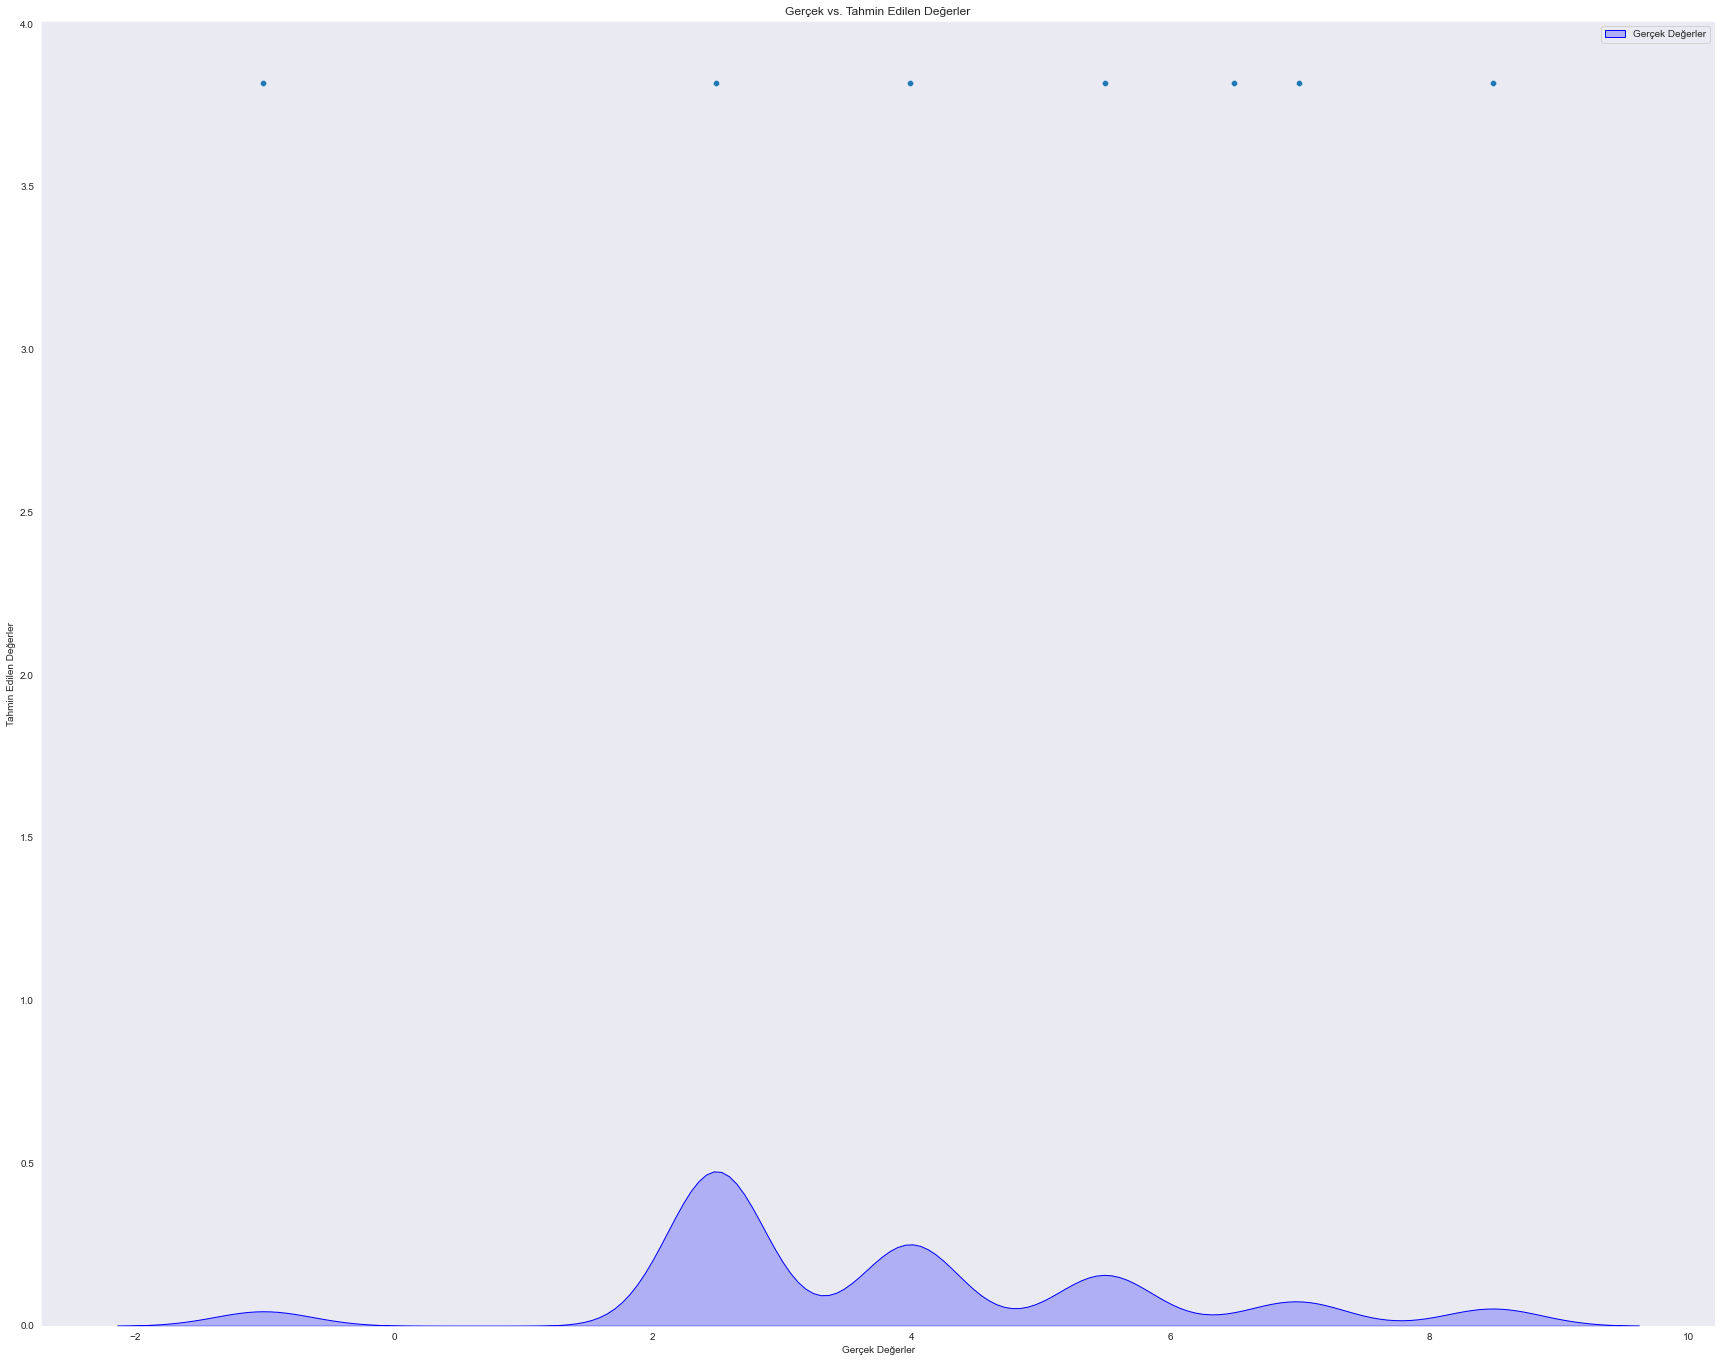

In [220]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# result_df isminde bir DataFrame oluşturulduğunu varsayalım
result_df = pd.DataFrame({'Gerçek Değerler': y_test.flatten(), 'Tahmin Edilen Değerler': y_pred.flatten()})

# Scatter plot ve yoğunluk grafiği çizimi
plt.figure(figsize=(30, 24))

# Scatter plot
sns.scatterplot(x='Gerçek Değerler', y='Tahmin Edilen Değerler', data=result_df, palette='viridis', edgecolor='w', alpha=0.7)

# Gerçek değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Gerçek Değerler'], label='Gerçek Değerler', color='blue', shade=True)

# Tahmin edilen değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Tahmin Edilen Değerler'], label='Tahmin Edilen Değerler', color='orange', shade=True)

plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

plt.legend()
plt.show()

Epoch 1/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 4.2288 - mae: 1.5999 - val_loss: 4.0260 - val_mae: 1.5697
Epoch 2/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 4.2284 - mae: 1.6000 - val_loss: 4.0260 - val_mae: 1.5697
Epoch 3/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 4.2285 - mae: 1.6001 - val_loss: 4.0260 - val_mae: 1.5697
Epoch 4/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 4.2285 - mae: 1.6001 - val_loss: 4.0260 - val_mae: 1.5697
Epoch 5/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 4.2285 - mae: 1.6001 - val_loss: 4.0260 - val_mae: 1.5697
Epoch 6/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - loss: 4.2285 - mae: 1.6001 - val_loss: 4.0260 - val_mae: 1.5697
Epoch 7/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - loss: 4.2285 - mae: 1.6001 - val_loss: 4.0260 - val_mae: 1.5697
Epoch 8/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 4.2285 - mae: 1.6001 - val_loss: 4.0260 - val_mae: 1.5697
Epoch 9/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 

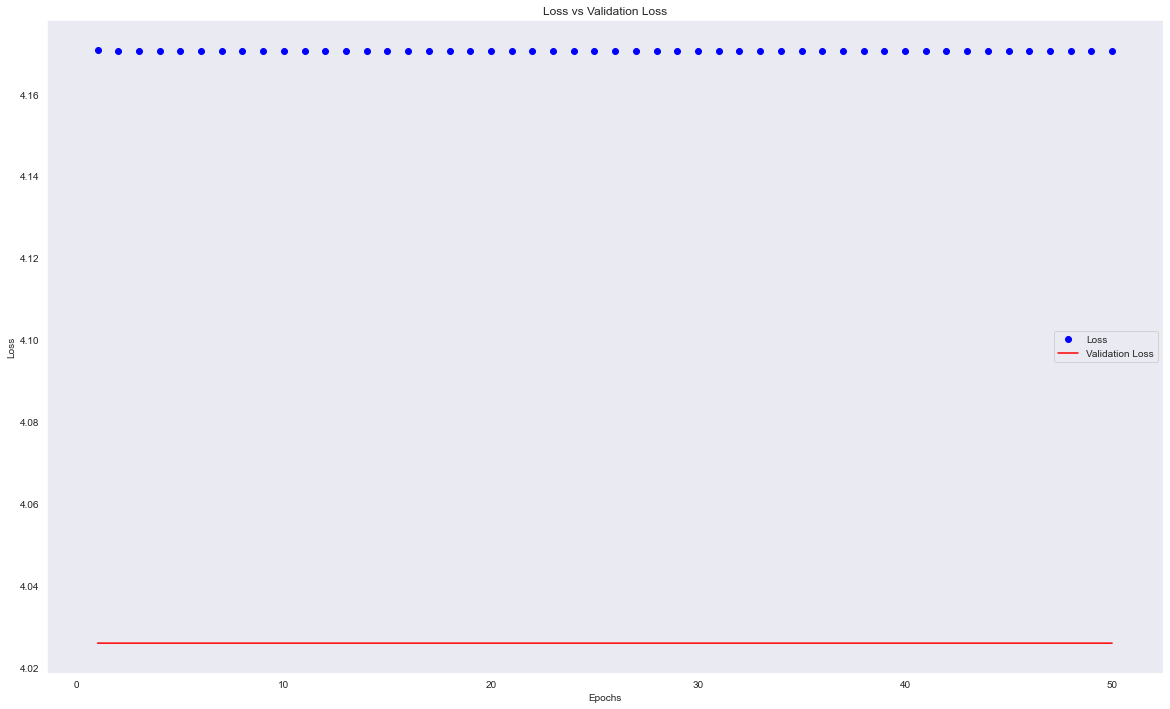

In [221]:
# Modelin eğitim sırasında kayıp (loss) ve doğrulama kaybı (validation loss) değerleri
history = mlp.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Modelin eğitim sürecindeki kayıp (loss) değerleri
loss = history.history['loss']

# Modelin eğitim sürecindeki doğrulama kaybı (validation loss) değerleri
val_loss = history.history['val_loss']

# Eğitim ve doğrulama kaybı grafiği çizimi
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(20, 12))

plt.plot(epochs, loss, 'bo', label='Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Üç model de forecasting açısından güzel sonuçlar verdi. Özellikle ML uygulamaları hız açısından dinamik veri sistemi oluşturulacaksa böyle bir veri için uygun olabilir